In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load NSL-KDD dataset (Encoded and Important Features only)
data = pd.read_csv('./dataset/kdd_full_clean_5classes.csv')

# Display the first few rows of the dataset to understand its structure
print('originail shape:', data.shape)
data.head()

df_cluster_vae = pd.read_csv('./generations_nsl/cluster_vae_df_eps_1pt5.csv')


originail shape: (148517, 42)


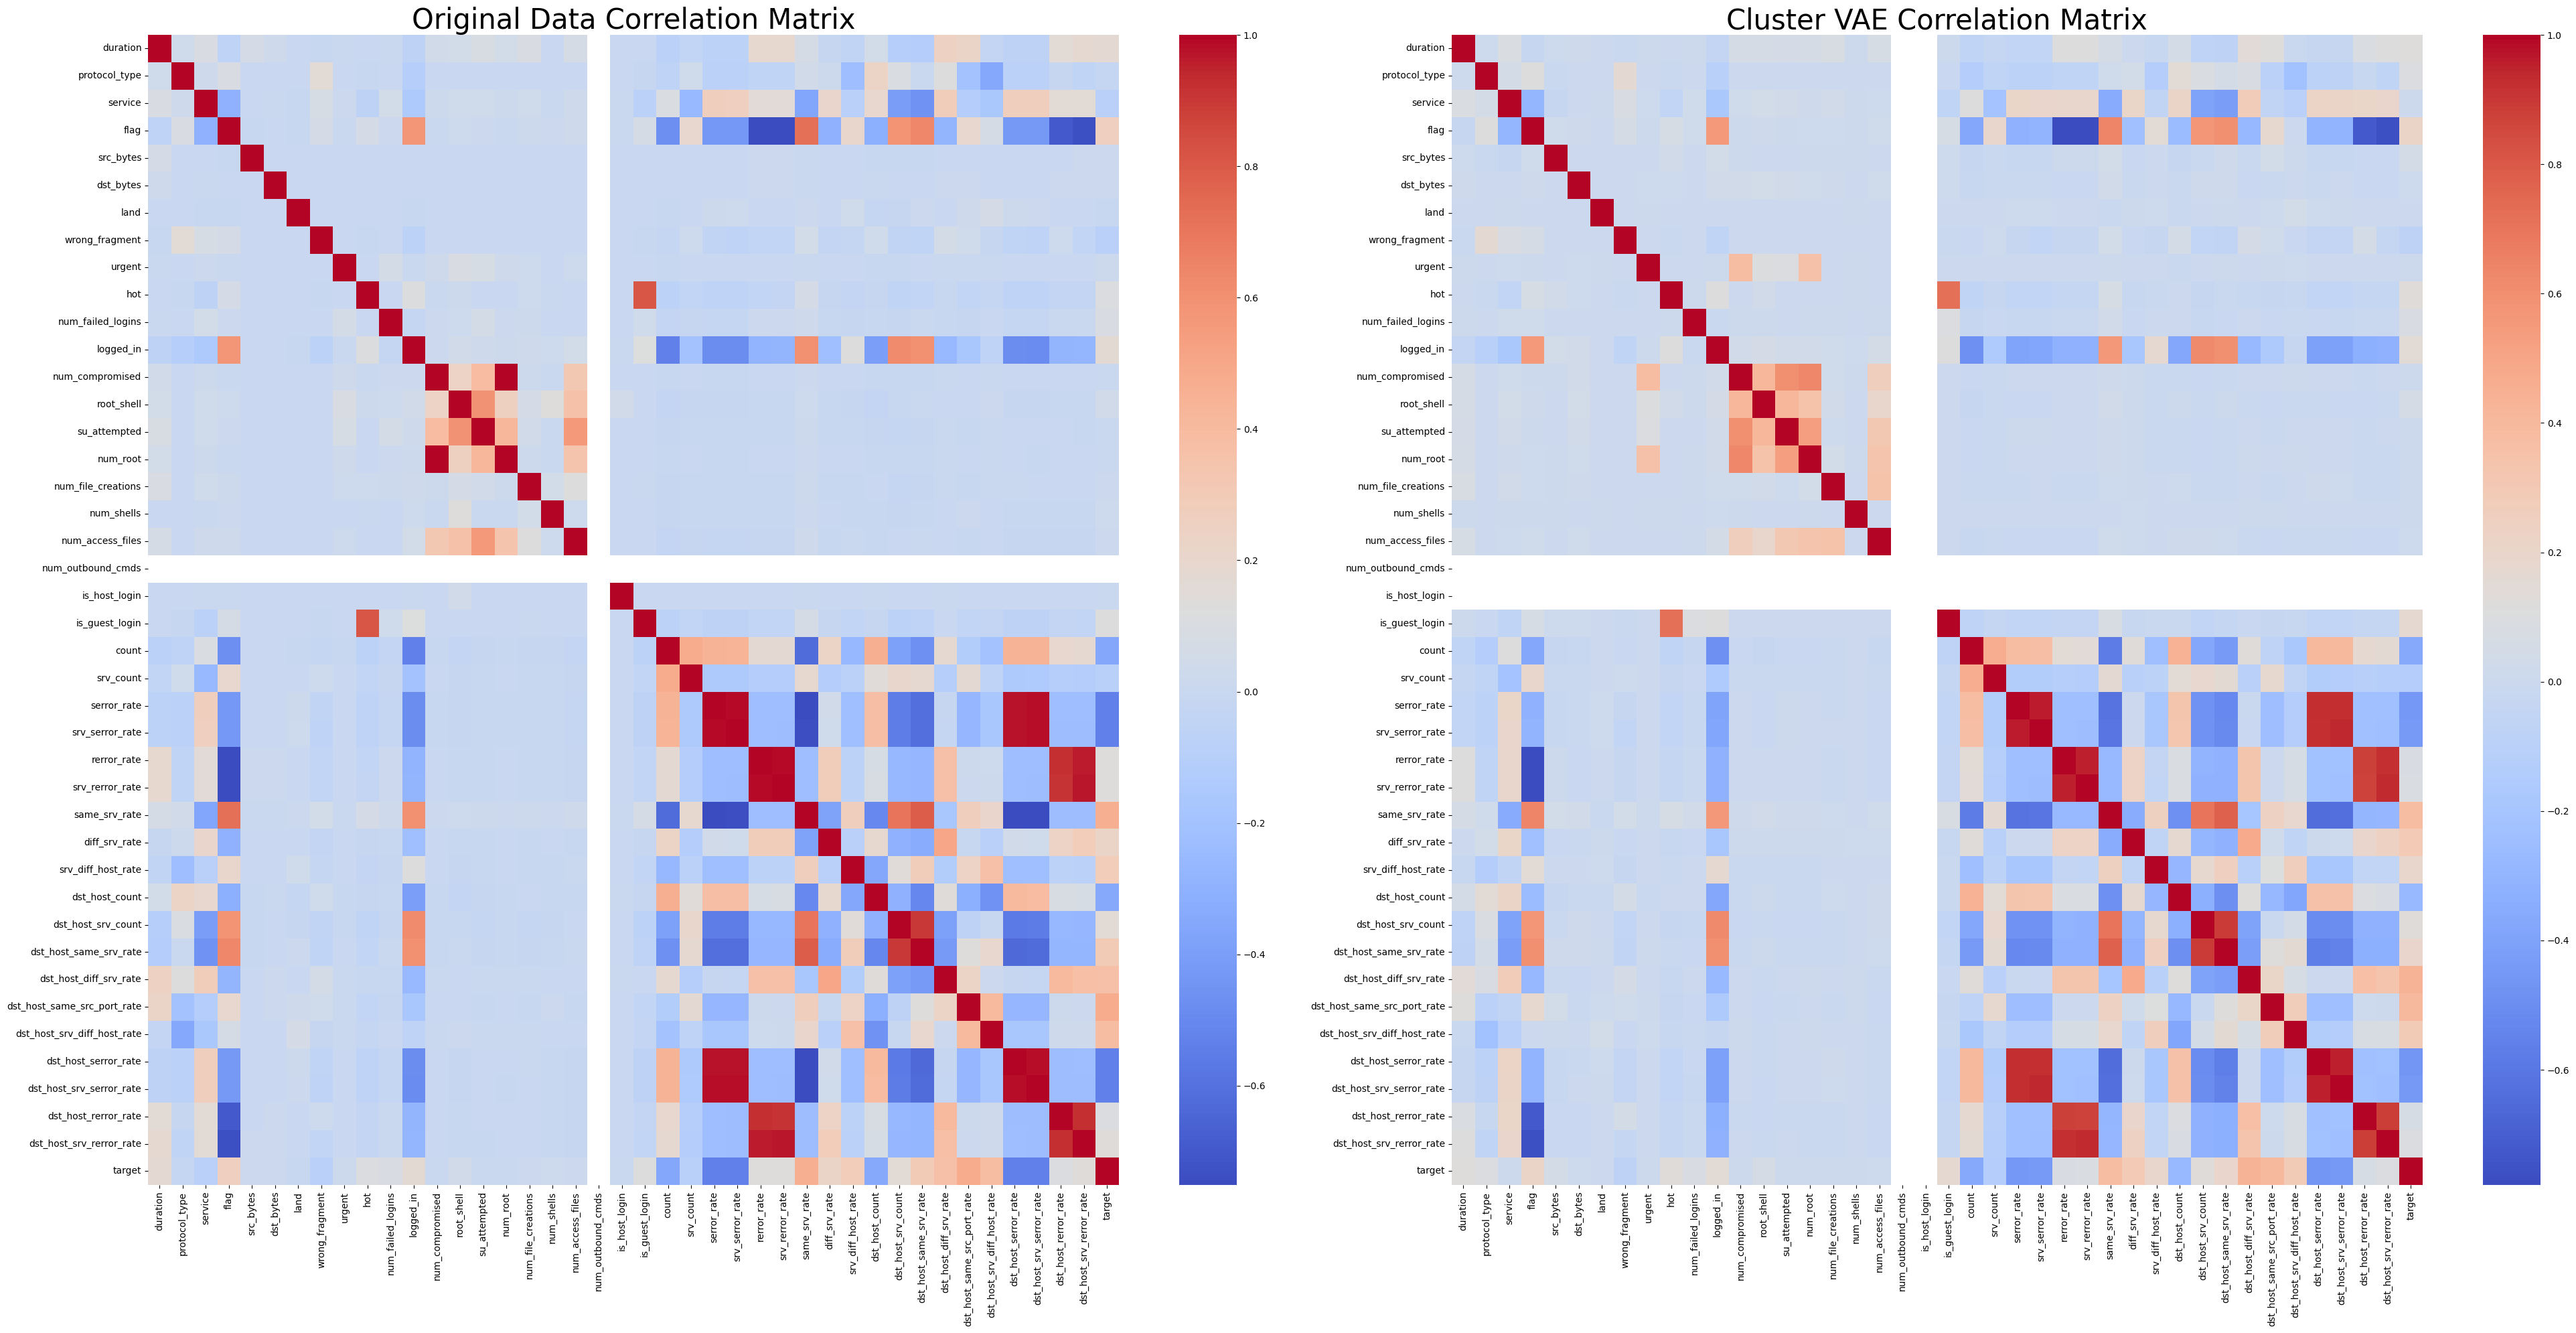

In [8]:
# Side-by-side correlation matrices (large format)
fig, axes = plt.subplots(1, 2, figsize=(40, 20))  # Width 40, height 20 for high-resolution display

# Correlation matrix for the original dataset
sns.heatmap(
    data.corr(), 
    ax=axes[0], 
    cmap="coolwarm", 
    annot=False,
    xticklabels=data.columns, 
    yticklabels=data.columns
)
axes[0].set_title("Original Data Correlation Matrix", fontsize=30)

# Correlation matrix for the generated (Cluster VAE) dataset
sns.heatmap(
    df_cluster_vae.corr(), 
    ax=axes[1], 
    cmap="coolwarm", 
    annot=False,
    xticklabels=df_cluster_vae.columns, 
    yticklabels=df_cluster_vae.columns
)
axes[1].set_title("Cluster VAE Correlation Matrix", fontsize=30)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


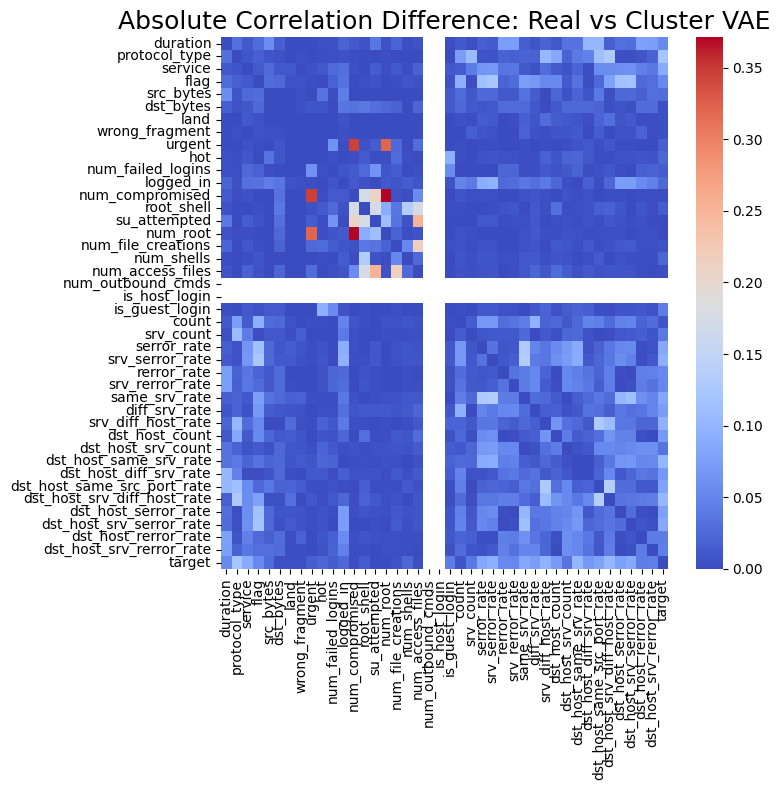

In [9]:
# === Compute pairwise correlations ===
corr_original = data.corr()             # Correlation matrix for original data
corr_cluster_vae = df_cluster_vae.corr()  # Correlation matrix for synthetic data (e.g., from Cluster VAE)

# === Compute absolute difference between the two correlation matrices ===
abs_diff_cluster_vae = np.abs(corr_original - corr_cluster_vae)

# === Visualization ===
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))  # 8x8 is usually sufficient for clear display

# Heatmap of absolute correlation differences
sns.heatmap(
    abs_diff_cluster_vae,
    ax=ax,
    cmap="coolwarm",
    annot=False,
    xticklabels=abs_diff_cluster_vae.columns,
    yticklabels=abs_diff_cluster_vae.columns
)

# Title and layout
ax.set_title("Absolute Correlation Difference: Real vs Cluster VAE", fontsize=18)
plt.tight_layout()
plt.show()


/tmp/ipykernel_4057/2770543603.py:31: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(real_data[column], label='Original Data', ax=ax, color='blue', linewidth=2)
/tmp/ipykernel_4057/2770543603.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(synthetic_data[column], label=label_synth, ax=ax, color='red', linewidth=2)
/tmp/ipykernel_4057/2770543603.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(synthetic_data[column], label=label_synth, ax=ax, color='red', linewidth=2)


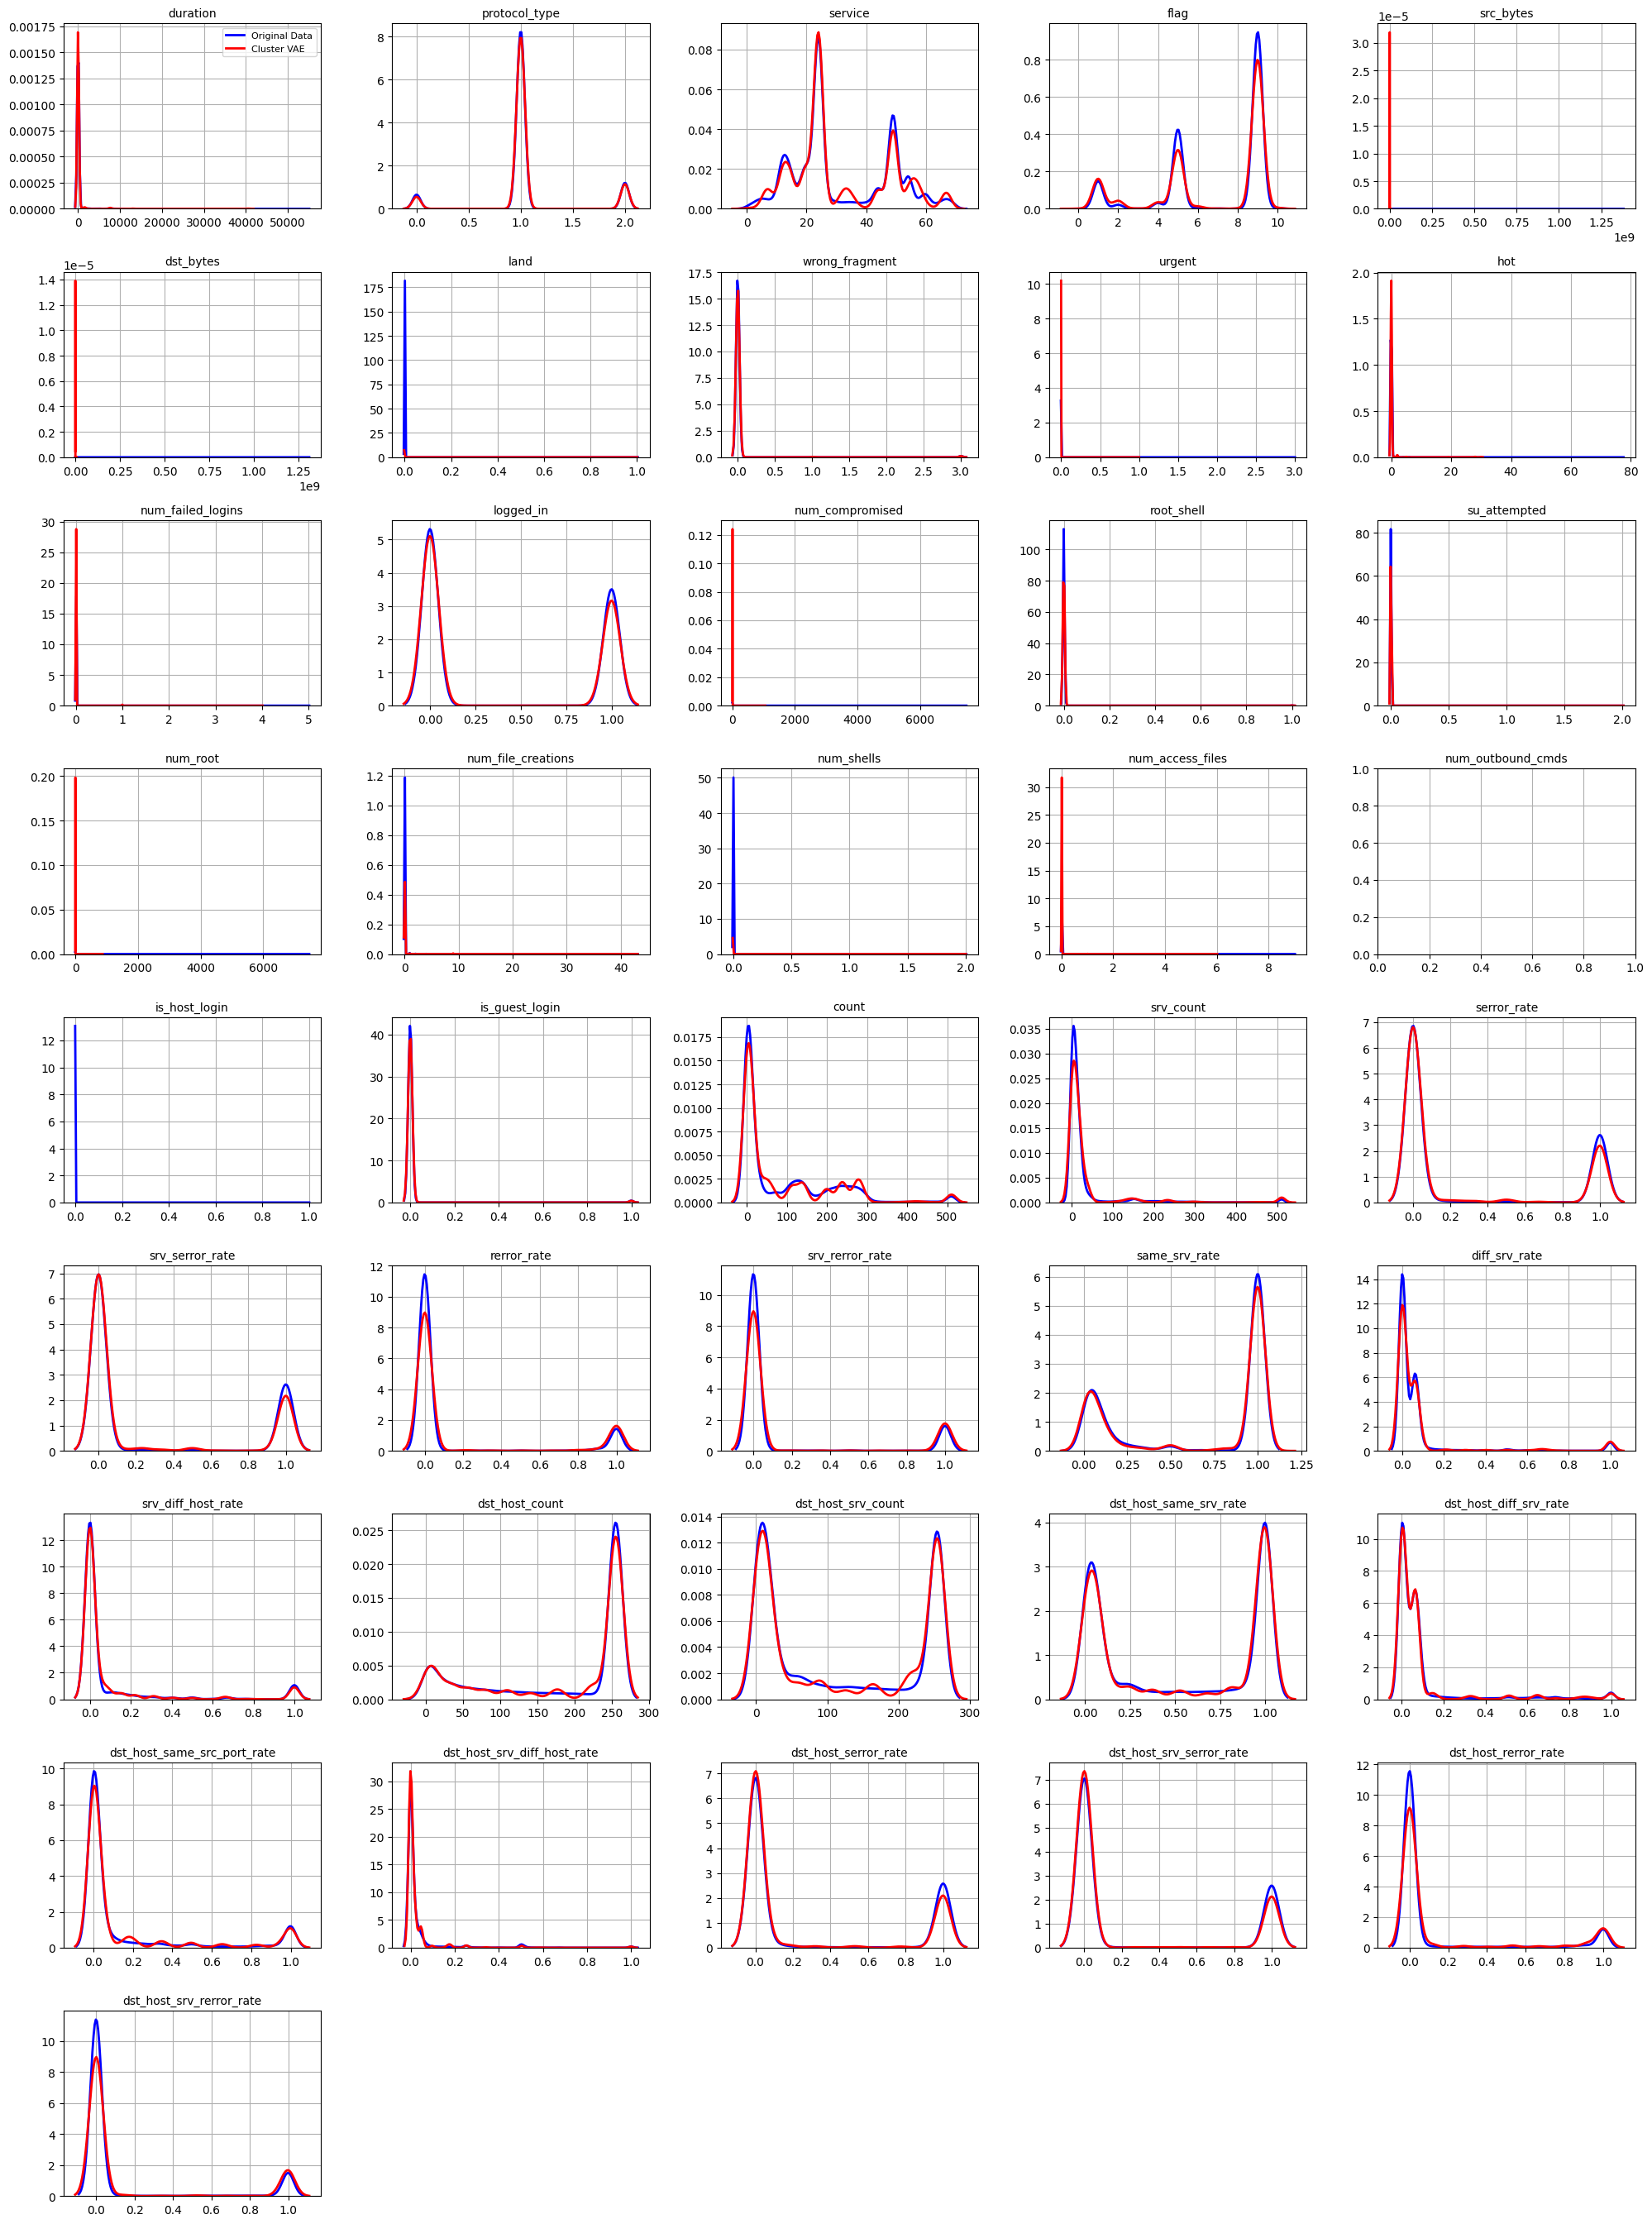

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_kde_comparison_grid(real_data, synthetic_data, label_synth="Cluster VAE", n_cols=5):
    """
    Plot KDEs for all numerical features in a grid layout for comparison between real and synthetic data.
    
    Parameters:
    - real_data (pd.DataFrame): Original dataset
    - synthetic_data (pd.DataFrame): Generated dataset
    - label_synth (str): Label for synthetic data in the legend
    - n_cols (int): Number of columns in the subplot grid (default is 5)

    Notes:
    - Real data is plotted in blue.
    - Synthetic data is plotted in red.
    - The 'target' column is excluded from the plots.
    """
    # Select all columns except the label/target
    columns = [col for col in real_data.columns if col != 'target']
    n_features = len(columns)
    n_rows = math.ceil(n_features / n_cols)

    # Create the grid of subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
    axes = axes.flatten()

    for idx, column in enumerate(columns):
        ax = axes[idx]
        sns.kdeplot(real_data[column], label='Original Data', ax=ax, color='blue', linewidth=2)
        sns.kdeplot(synthetic_data[column], label=label_synth, ax=ax, color='red', linewidth=2)

        ax.set_title(column, fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.grid(True)

        # Add legend only to the first subplot
        if idx == 0:
            ax.legend(fontsize=8)
    
    # Hide any unused subplots
    for i in range(n_features, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Example call
plot_kde_comparison_grid(data, df_cluster_vae, label_synth="Cluster VAE")
